# Animal bites in Louisville

In [1]:
# Set up the environment
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Import that dataset
filename = pd.read_csv('Health_AnimalBites.csv')
data = pd.DataFrame(filename)
data.shape

(9003, 15)

In [3]:
data.head()

,bite_date,SpeciesIDDesc,BreedIDDesc,GenderIDDesc,color,vaccination_yrs,vaccination_date,victim_zip,AdvIssuedYNDesc,WhereBittenIDDesc,quarantine_date,DispositionIDDesc,head_sent_date,release_date,ResultsIDDesc
0,1985-05-05 00:00:00,DOG,NaN,FEMALE,LIG. BROWN,1.0,1985-06-20 00:00:00,40229,NO,BODY,1985-05-05 00:00:00,UNKNOWN,NaN,NaN,UNKNOWN
1,1986-02-12 00:00:00,DOG,NaN,UNKNOWN,BRO & BLA,NaN,NaN,40218,NO,BODY,1986-02-12 00:00:00,UNKNOWN,NaN,NaN,UNKNOWN
2,1987-05-07 00:00:00,DOG,NaN,UNKNOWN,NaN,NaN,NaN,40219,NO,BODY,1990-05-07 00:00:00,UNKNOWN,NaN,NaN,UNKNOWN
3,1988-10-02 00:00:00,DOG,NaN,MALE,BLA & BRO,NaN,NaN,NaN,NO,BODY,1990-10-02 00:00:00,UNKNOWN,NaN,NaN,UNKNOWN
4,1989-08-29 00:00:00,DOG,NaN,FEMALE,BLK-WHT,NaN,NaN,NaN,NO,BODY,NaN,UNKNOWN,NaN,NaN,UNKNOWN


In [4]:
data['bite_date'] = pd.to_datetime(data['bite_date'], errors='coerce')
data['vaccination_date'] = pd.to_datetime(data['vaccination_date'], errors='coerce')
data['quarantine_date'] = pd.to_datetime(data['quarantine_date'], errors='coerce')
data['head_sent_date'] = pd.to_datetime(data['head_sent_date'], errors='coerce')
data['release_date'] = pd.to_datetime(data['release_date'], errors='coerce')


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9003 entries, 0 to 9002
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   bite_date          8685 non-null   datetime64[ns]
 1   SpeciesIDDesc      8885 non-null   object        
 2   BreedIDDesc        3759 non-null   object        
 3   GenderIDDesc       6477 non-null   object        
 4   color              6426 non-null   object        
 5   vaccination_yrs    3738 non-null   float64       
 6   vaccination_date   4115 non-null   datetime64[ns]
 7   victim_zip         7165 non-null   object        
 8   AdvIssuedYNDesc    2565 non-null   object        
 9   WhereBittenIDDesc  8387 non-null   object        
 10  quarantine_date    2020 non-null   datetime64[ns]
 11  DispositionIDDesc  1535 non-null   object        
 12  head_sent_date     395 non-null    datetime64[ns]
 13  release_date       1445 non-null   datetime64[ns]
 14  ResultsI

In [6]:
#Check for null values
nulldata = data.isnull().sum()
nulldata = pd.DataFrame(nulldata)
nulldata.columns = ["Count"]
nulldata['Percent'] = (data.isnull().sum())/data.shape[0]
print('Null counts:')
print(nulldata)

Null counts:
                   Count   Percent
bite_date            318  0.035322
SpeciesIDDesc        118  0.013107
BreedIDDesc         5244  0.582473
GenderIDDesc        2526  0.280573
color               2577  0.286238
vaccination_yrs     5265  0.584805
vaccination_date    4888  0.542930
victim_zip          1838  0.204154
AdvIssuedYNDesc     6438  0.715095
WhereBittenIDDesc    616  0.068422
quarantine_date     6983  0.775630
DispositionIDDesc   7468  0.829501
head_sent_date      8608  0.956126
release_date        7558  0.839498
ResultsIDDesc       7460  0.828613


## Animal characteristics

### Species

In [7]:
data.SpeciesIDDesc.value_counts()

DOG        7029
CAT        1568
BAT         237
RACCOON      27
OTHER        11
HORSE         5
FERRET        4
RABBIT        3
SKUNK         1
Name: SpeciesIDDesc, dtype: int64

In [8]:
7029 / data.shape[0]

0.7807397534155281

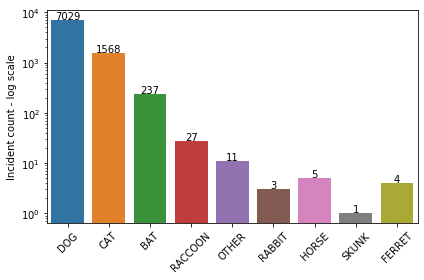

In [9]:
splot = sns.countplot('SpeciesIDDesc', data=data)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 4), color='black',
                   textcoords = 'offset points')
plt.yscale('log')
#plt.title('Species Count')
plt.xlabel('')
plt.ylabel('Incident count - log scale')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('SpeciesCountLog.png')

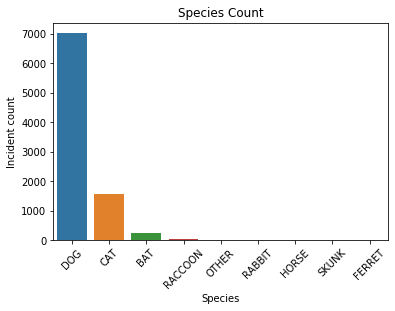

In [10]:
sns.countplot('SpeciesIDDesc', data=data)
#plt.yscale('log')
plt.title('Species Count')
plt.xlabel('Species')
plt.ylabel('Incident count')
plt.xticks(rotation=45)
plt.savefig('SpeciesCountScale.png')

Most (78%) of the reported animal bites are caused by dogs.

### Breed

In [11]:
breeds = data.loc[data.BreedIDDesc.notnull()]
breeds.SpeciesIDDesc.value_counts()

DOG    3755
CAT       3
Name: SpeciesIDDesc, dtype: int64

Breeds are only available for dogs and cats, not other animals. All but three of the breed entries are for dogs, and two of the cat breeds are 'other'.

In [12]:
cat = data.loc[data.SpeciesIDDesc=='CAT']
cat.BreedIDDesc.value_counts()

OTHER     2
BEAGLE    1
Name: BreedIDDesc, dtype: int64

In [13]:
dog = data.loc[data.SpeciesIDDesc=='DOG']
dog_count = dog.BreedIDDesc.value_counts(sort=True, ascending=False)
dog_count = dog_count.loc[dog_count>1].copy()
#dog_count = pd.DataFrame(dog_count)
print(dog_count.head(10))

PIT BULL           1101
GERM SHEPHERD       327
LABRADOR RETRIV     253
BOXER               181
CHICHAUHUA          165
SHIH TZU            119
BEAGLE              115
ROTTWEILER           86
AAUST. TERR.         78
DACHSHUND            67
Name: BreedIDDesc, dtype: int64


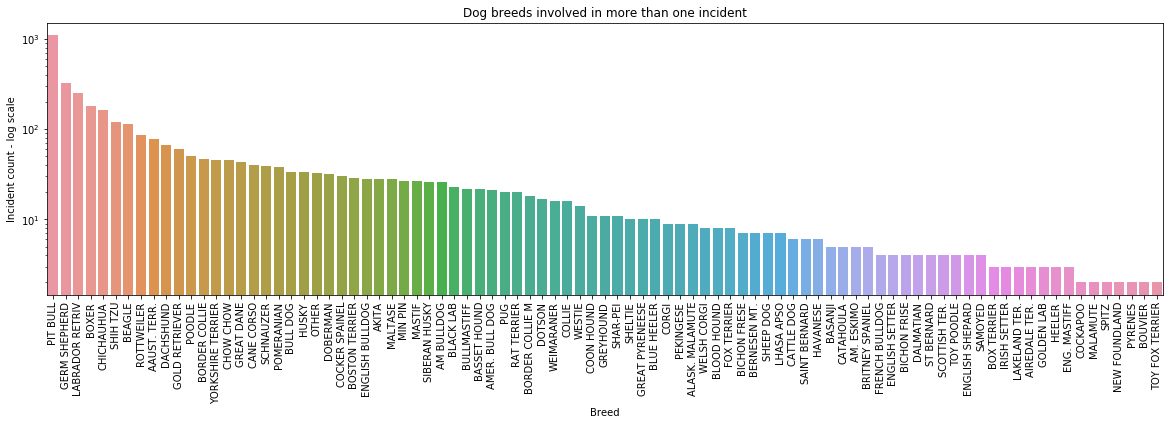

In [14]:
fig = plt.figure(figsize=(20, 5))
#sns.countplot(data.loc[(data.SpeciesIDDesc=='DOG')].BreedIDDesc)
sns.barplot(dog_count.index, dog_count.values)
plt.xticks(rotation=90)
plt.xlabel('Breed')
plt.ylabel('Incident count - log scale')
plt.yscale('log')
plt.title('Dog breeds involved in more than one incident')
plt.savefig('Breeds.png')

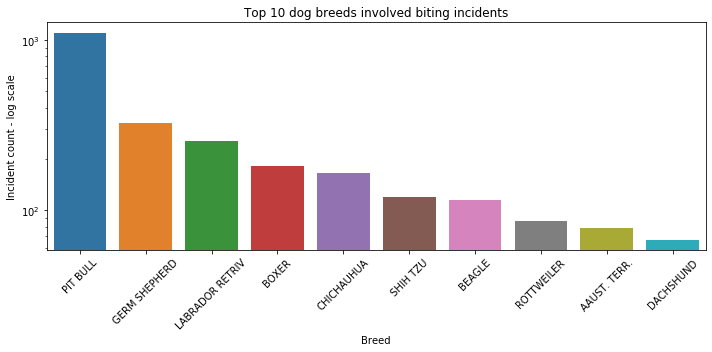

In [15]:
fig = plt.figure(figsize=(10, 5))
#sns.countplot(data.loc[(data.SpeciesIDDesc=='DOG')].BreedIDDesc)
sns.barplot(dog_count.index[0:10], dog_count.values[0:10])
plt.xticks(rotation=45)
plt.xlabel('Breed')
plt.ylabel('Incident count - log scale')
plt.yscale('log')
plt.title('Top 10 dog breeds involved biting incidents')
plt.tight_layout()
plt.savefig('Breeds.png')

In [16]:
1101/7029

0.15663679043960735

Pit bulls are the most common breed associated with bites - 15.7% of dog bites are from pit bulls.
German shepherds, labrador retrivers, boxers, and chichauhua are the next most common breed of biting dogs.

### Animal gender

In [17]:
data.GenderIDDesc.value_counts()

MALE       3832
FEMALE     2016
UNKNOWN     629
Name: GenderIDDesc, dtype: int64

In [18]:
data.GenderIDDesc.isnull().sum()

2526

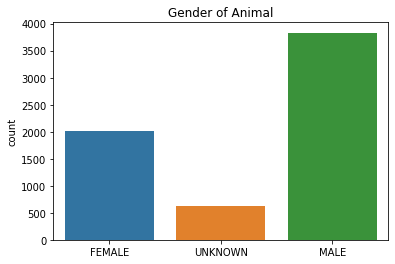

In [19]:
sns.countplot(data.GenderIDDesc)
plt.title('Gender of Animal')
plt.xlabel('')
plt.savefig('GenderAnimal.png')

### Color

In [20]:
data.color.value_counts()

BLACK         671
BROWN         433
WHITE         394
BLK WHT       277
TAN           223
             ... 
MULTICOLOR      1
TAN/BROWN       1
OR WHITE        1
BRN/BLACK       1
TANN            1
Name: color, Length: 712, dtype: int64

In [21]:
data.color.isnull().sum()

2577

### Vaccination information

In [22]:
# How many years since the last vaccination
data.vaccination_yrs.value_counts()

1.0     2894
3.0      837
2.0        6
11.0       1
Name: vaccination_yrs, dtype: int64

In [23]:
data.vaccination_yrs.isnull().sum()

5265

For the animals on which we have data, most had been vaccinated within the last year. I assume this means they were current on their vaccinations. 

In [24]:
# Date of last vaccination
data.vaccination_date.value_counts()

2015-10-01    8
2014-04-01    7
2011-07-08    7
2014-04-02    7
2013-04-01    7
             ..
2016-07-18    1
2012-07-18    1
2012-02-11    1
2013-12-18    1
2008-10-26    1
Name: vaccination_date, Length: 2107, dtype: int64

In [25]:
data.vaccination_date.isnull().sum()

4888

### Quarantine details

In [26]:
data.quarantine_date.value_counts()

2010-04-05    18
2011-06-01    14
2010-11-08    14
2010-02-01    13
2011-06-27    13
              ..
2009-12-28     1
2011-05-26     1
2011-05-30     1
2010-07-18     1
2011-02-07     1
Name: quarantine_date, Length: 602, dtype: int64

In [27]:
data.quarantine_date.isnull().sum()

6983

In [28]:
# Whether the animal was released from quarantine
data.DispositionIDDesc.value_counts()

RELEASED    912
UNKNOWN     603
KILLED       16
DIED          4
Name: DispositionIDDesc, dtype: int64

In [29]:
data.loc[data.DispositionIDDesc=='KILLED'].SpeciesIDDesc.value_counts()


DOG      9
BAT      4
CAT      2
OTHER    1
Name: SpeciesIDDesc, dtype: int64

In [30]:
data.pivot_table(index='SpeciesIDDesc', columns='DispositionIDDesc', aggfunc='count')

AdvIssuedYNDesc                         BreedIDDesc         \
DispositionIDDesc            DIED KILLED RELEASED UNKNOWN        DIED KILLED   
SpeciesIDDesc                                                                  
BAT                           NaN    4.0      NaN    10.0         NaN    0.0   
CAT                           2.0    2.0    132.0   151.0         0.0    0.0   
DOG                           1.0    8.0    775.0   436.0         1.0    6.0   
OTHER                         1.0    1.0      NaN     3.0         0.0    0.0   
RACCOON                       NaN    NaN      NaN     2.0         NaN    NaN   

                                   GenderIDDesc         ... vaccination_date  \
DispositionIDDesc RELEASED UNKNOWN         DIED KILLED  ...         RELEASED   
SpeciesIDDesc                                           ...                    
BAT                    NaN     0.0          NaN    0.0  ...              NaN   
CAT                    0.0     0.0          1.0    1.0  ...            101.0   
DOG                  142.0    14.0          1.0    8.0  ...            605.0   
OTHER                  NaN     0.0          0.0    0.0  ...              NaN   
RACCOON                NaN     0.0          NaN    NaN  ...              NaN   

                          vaccination_yrs                         victim_zip  \
DispositionIDDesc UNKNOWN            DIED KILLED RELEASED UNKNOWN       DIED   
SpeciesIDDesc                                                                  
BAT                   0.0             NaN    0.0      NaN     0.0        NaN   
CAT                   7.0             0.0    0.0    102.0     3.0        2.0   
DOG                  70.0             0.0    0.0    601.0    30.0        1.0   
OTHER                 0.0             0.0    0.0      NaN     0.0        1.0   
RACCOON               0.0             NaN    NaN      NaN     0.0        NaN   

                                           
DispositionIDDesc KILLED RELEASED UNKNOWN  
SpeciesIDDesc                              
BAT                  4.0      NaN     9.0  
CAT                  2.0    128.0   150.0  
DOG                  9.0    743.0   426.0  
OTHER                1.0      NaN     3.0  
RACCOON              NaN      NaN     2.0  

[5 rows x 52 columns]

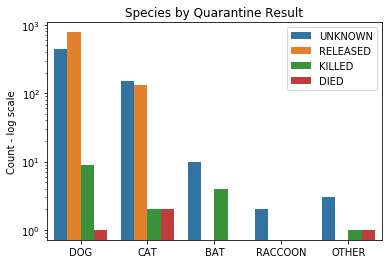

In [31]:
# Filter out species without Disposition data
disposition = data.loc[data.DispositionIDDesc.notnull()]

sns.countplot('SpeciesIDDesc', data=disposition, hue='DispositionIDDesc')
plt.yscale('log')
plt.ylabel('Count - log scale')
plt.xlabel('')
plt.legend(loc = 'upper right')
plt.title('Species by Quarantine Result')
plt.savefig('SpeciesQuarantine.png')

In [32]:
data.head_sent_date.value_counts()

2010-05-21    4
2015-06-02    3
2015-08-17    3
2017-01-11    3
2016-07-27    3
             ..
2016-05-19    1
2016-06-29    1
2016-08-28    1
2017-08-23    1
2015-09-02    1
Name: head_sent_date, Length: 325, dtype: int64

In [33]:
data.release_date.value_counts()

2016-07-05    13
2017-09-05    12
2016-04-04    11
2016-05-23     9
2017-05-08     9
              ..
2015-09-22     1
2013-06-10     1
2016-07-22     1
2015-10-25     1
2017-02-10     1
Name: release_date, Length: 582, dtype: int64

In [34]:
data.loc[data.ResultsIDDesc=='POSITIVE'].SpeciesIDDesc

1418    BAT
1502    DOG
1677    BAT
1678    BAT
Name: SpeciesIDDesc, dtype: object

In [35]:
data.loc[data.ResultsIDDesc=='NEGATIVE'].SpeciesIDDesc.value_counts()

BAT        160
CAT         64
DOG         58
RACCOON      9
OTHER        5
Name: SpeciesIDDesc, dtype: int64

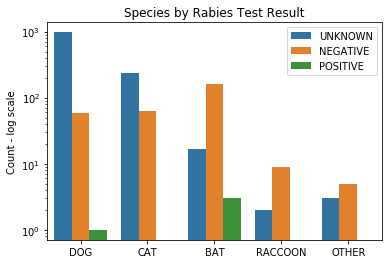

In [36]:
# Filter out species without Disposition data
rabies_result = data.loc[data.ResultsIDDesc.notnull()]

sns.countplot('SpeciesIDDesc', data=rabies_result, hue='ResultsIDDesc')
plt.yscale('log')
plt.ylabel('Count - log scale')
plt.xlabel('')
plt.legend(loc = 'upper right')
plt.title('Species by Rabies Test Result')
plt.savefig('SpeciesRabies.png')

## Victim information

In [37]:
data.victim_zip.value_counts()

40272    376
40291    368
40216    362
40215    356
40214    348
        ... 
40076      1
19341      1
29717      1
36877      1
41018      1
Name: victim_zip, Length: 233, dtype: int64

In [38]:
data.AdvIssuedYNDesc.value_counts()

NO     1914
YES     651
Name: AdvIssuedYNDesc, dtype: int64

In [39]:
data.WhereBittenIDDesc.value_counts()

BODY       6213
HEAD       1244
UNKNOWN     930
Name: WhereBittenIDDesc, dtype: int64

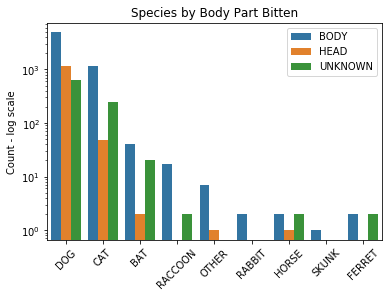

In [40]:
bite_loc = data.loc[data.WhereBittenIDDesc.notnull()]

sns.countplot('SpeciesIDDesc', data=bite_loc, hue='WhereBittenIDDesc')
plt.yscale('log')
plt.ylabel('Count - log scale')
plt.xlabel('')
plt.legend(loc = 'upper right')
plt.xticks(rotation=45)
plt.title('Species by Body Part Bitten')
plt.savefig('SpeciesBiteLocation.png')

## Is there a pattern to the timing of dog bites?
Are more people bitten in the summer than in the winter?

In [41]:
data['Month']= data['bite_date'].dt.month
data['Year']=data['bite_date'].dt.year

In [42]:
data.Year.value_counts()

2012.0    1180
2014.0    1176
2011.0    1148
2013.0    1145
2010.0    1131
2016.0    1051
2015.0     985
2017.0     801
2009.0      14
1992.0      10
1994.0       7
1990.0       6
1993.0       6
1991.0       5
2201.0       3
1952.0       2
1989.0       2
2020.0       1
1985.0       1
1986.0       1
1987.0       1
1988.0       1
2021.0       1
1995.0       1
2101.0       1
1999.0       1
2001.0       1
2002.0       1
2007.0       1
2018.0       1
Name: Year, dtype: int64

In [43]:
data['bite_year_month'] = data['bite_date'].dt.strftime('%Y-%m')

In [44]:
data.bite_year_month.value_counts()

2013-05    139
2014-05    135
2014-08    129
2011-08    129
2010-05    125
          ... 
2009-10      1
1993-06      1
2101-02      1
1991-10      1
1993-12      1
Name: bite_year_month, Length: 139, dtype: int64

In [45]:
max_bites = data.loc[(data.Year > 2009) & (data.Year < 2018)]
max_bites.shape

(8617, 18)

In [46]:
max_bites_gp = max_bites.groupby('bite_year_month').size().reset_index().rename(columns={0: 'count_bites'})
print(max_bites_gp)
bite_mean = max_bites_gp.count_bites.mean()
print(bite_mean)

   bite_year_month  count_bites
0          2010-01           61
1          2010-02           65
2          2010-03           87
3          2010-04          104
4          2010-05          125
..             ...          ...
88         2017-05          113
89         2017-06          124
90         2017-07          121
91         2017-08          124
92         2017-09           24

[93 rows x 2 columns]
92.65591397849462


In [47]:
max_bites_gp['bite_year_month'] = pd.to_datetime(max_bites_gp['bite_year_month'])
max_bites_gp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   bite_year_month  93 non-null     datetime64[ns]
 1   count_bites      93 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.6 KB


In [48]:
yr_df = {}

for year in max_bites_gp['bite_year_month'].dt.year:
    yr_df[year] = max_bites_gp.loc[max_bites_gp.bite_year_month.dt.year == year].copy()
    yr_df[year]['Month'] = yr_df[year]['bite_year_month'].dt.month
    
print(yr_df.keys())

dict_keys([2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017])


In [49]:
print(yr_df[2010])

   bite_year_month  count_bites  Month
0       2010-01-01           61      1
1       2010-02-01           65      2
2       2010-03-01           87      3
3       2010-04-01          104      4
4       2010-05-01          125      5
5       2010-06-01          113      6
6       2010-07-01          116      7
7       2010-08-01          104      8
8       2010-09-01           78      9
9       2010-10-01          104     10
10      2010-11-01           90     11
11      2010-12-01           84     12


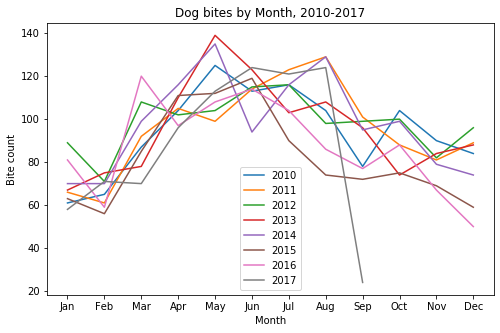

In [50]:
fig=plt.figure(figsize=(8, 5))
for year in yr_df.keys():
    sns.lineplot(x='Month', y='count_bites', data=yr_df[year], label=year)
    
#plt.hlines(bite_mean, 1, 12, linestyle='dashed', label='mean')
plt.xticks(ticks = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.title('Dog bites by Month, 2010-2017')
plt.ylabel('Bite count')
#plt.vlines(4.5, 20, 140, linestyle='dotted')
#plt.vlines(8.5, 20, 140, linestyle='dotted')
plt.savefig('BitesMonth.png')